In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.tools import (
    constrain_stationary_univariate, unconstrain_stationary_univariate, constrain_stationary_multivariate)
%load_ext autoreload
%autoreload 2

In [2]:
from persisten_dividend_SSM import PersistentDividendModel 

In [3]:
data_source = pd.read_excel("usa_var_data.xlsx")
data_source.set_index("Date", inplace=True)

data_quarterly = data_source[["Yeld_10Y", "T_Bill", "Dividend", "Stock_Price", "CPI"]].resample('Q').last()

data_quarterly[["Yeld_10Y", "T_Bill"]] = data_quarterly[["Yeld_10Y", "T_Bill"]] / 4

data_quarterly["CPIQ"] = data_quarterly["CPI"].pct_change()

data_quarterly["DivGrowth"] = data_quarterly["Dividend"].pct_change() - data_quarterly["CPIQ"]

data_quarterly["P/D"] = np.log(data_quarterly["Stock_Price"]/data_quarterly["Dividend"])

data_quarterly = data_quarterly.loc["1953-06-30":"1999-03-31"] 

data = data_quarterly[["P/D", "Yeld_10Y", "T_Bill", "DivGrowth", "CPIQ"]] - data_quarterly[["P/D", "Yeld_10Y", "T_Bill", "DivGrowth", "CPIQ"]].mean()



data = data * 100
display(data_quarterly[["P/D", "Yeld_10Y", "T_Bill", "DivGrowth", "CPIQ"]].mean())
display(data.tail(10))
np.round(data.describe(), decimals=4)


P/D          3.372585
Yeld_10Y     0.016942
T_Bill       0.013688
DivGrowth    0.003453
CPIQ         0.010044
dtype: float64

,P/D,Yeld_10Y,T_Bill,DivGrowth,CPIQ
Date,,,,,
1996-12-31,56.395252,-0.086721,-0.141332,0.596402,-0.499072
1997-03-31,55.164042,0.035779,-0.083832,-0.100452,-0.313053
1997-06-30,73.512889,-0.066721,-0.136332,0.285004,-0.817176
1997-09-30,75.159399,-0.164221,-0.131332,0.086524,-0.319084
1997-12-31,75.378173,-0.256721,-0.078832,0.715995,-1.004442
1998-03-31,88.467014,-0.276721,-0.111332,0.383932,-0.447511
1998-06-30,90.700592,-0.334221,-0.123832,0.917253,-0.573673
1998-09-30,78.417089,-0.584221,-0.216332,0.101015,-0.514246
1998-12-31,96.718745,-0.531721,-0.271332,0.193204,-0.821515


,P/D,Yeld_10Y,T_Bill,DivGrowth,CPIQ
count,184.0000,184.0000,184.0000,184.0000,184.0000
mean,-0.0000,0.0000,0.0000,0.0000,-0.0000
std,29.4709,0.7067,0.7087,1.2988,0.8650
min,-59.7922,-1.0917,-1.2088,-4.5835,-1.9169
25%,-20.1314,-0.6343,-0.5051,-0.8957,-0.5624
50%,1.4297,-0.0180,-0.1001,-0.0796,-0.1660
75%,14.2869,0.3339,0.3999,0.7739,0.3259
max,102.3596,2.2658,2.5037,4.2714,3.1087


In [4]:
model = PersistentDividendModel(data, 13, 13)
res = model.fit()

res.summary()

c:\Users\matsz\programowanie\Optymalizacja_portfela\esg\persisten_dividend_SSM.py:216: ComplexWarning: Casting complex values to real discards the imaginary part
  L[np.tril_indices(8)] = params
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           Statespace Model Results                                           
==============================================================================================================
Dep. Variable:     ['P/D', 'Yeld_10Y', 'T_Bill', 'DivGrowth', 'CPIQ']   No. Observations:                  184
Model:                                        PersistentDividendModel   Log Likelihood               -2551.079
Date:                                                Wed, 04 Jun 2025   AIC                           5204.159
Time:                                                        21:17:23   BIC                           5368.120
Sample:                                                    06-30-1953   HQIC                          5270.614
                                                         - 03-31-1999                                         
Covariance Type:                                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
θ1_da          0.2719      0.878      0.310      0.757      -1.449       1.993
θ1_ra          0.6841      0.399      1.713      0.087      -0.098       1.467
θ1_πa          0.2215      0.232      0.956      0.339      -0.233       0.676
θ1_ea          0.5151      0.132      3.906      0.000       0.257       0.774
θ1_τa          0.3565      3.531      0.101      0.920      -6.565       7.278
θ2_da          0.2557      0.753      0.340      0.734      -1.220       1.732
θ2_ra          0.6779      0.513      1.322      0.186      -0.327       1.683
θ2_πa          0.2111      0.186      1.137      0.255      -0.153       0.575
θ2_ea          0.5881      0.140      4.189      0.000       0.313       0.863
θ2_τa          0.3705      2.815      0.132      0.895      -5.147       5.888
σ_p           86.4346      2.073     41.686      0.000      82.371      90.499
σ_il          -0.0395      0.009     -4.469      0.000      -0.057      -0.022
σ_is           0.4419      0.082      5.381      0.000       0.281       0.603
σ_d            2.3417      0.203     11.508      0.000       1.943       2.741
σ_π            0.6352      0.060     10.606      0.000       0.518       0.753
dp             1.2191         -0       -inf      0.000       1.219       1.219
rp_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
rp             0.6508         -0       -inf      0.000       0.651       0.651
πp_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
πp_rp         -0.0197         -0        inf      0.000      -0.020      -0.020
πp             0.7970         -0       -inf      0.000       0.797       0.797
da_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
da_rp         -0.0195         -0        inf      0.000      -0.020      -0.020
da_πp         -0.0214         -0        inf      0.000      -0.021      -0.021
da             1.1968         -0       -inf      0.000       1.197       1.197
ra_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
ra_rp         -0.0195         -0        inf      0.000      -0.020      -0.020
ra_πp         -0.0214         -0        inf      0.000      -0.021      -0.021
ra_da         -0.0319         -0        inf      0.000      -0.032      -0.032
ra             0.6210         -0       -inf      0.000       0.621       0.621
πa_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
πa_rp         -0.0195         -0        inf      0.000      -0.020      -0.020
πa_πp         -0.0214         -0        inf      0.000      -0.021      -0.021
πa_da         -0.0319         -0        inf      0.000      -0.032      -0.032
πa_ra         -0.0496         

In [5]:
model = PersistentDividendModel(data, 13, 13)
res = model.fit()

res.summary()

c:\Users\matsz\programowanie\Optymalizacja_portfela\esg\persisten_dividend_SSM.py:216: ComplexWarning: Casting complex values to real discards the imaginary part
  L[np.tril_indices(8)] = params
c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           Statespace Model Results                                           
==============================================================================================================
Dep. Variable:     ['P/D', 'Yeld_10Y', 'T_Bill', 'DivGrowth', 'CPIQ']   No. Observations:                  184
Model:                                        PersistentDividendModel   Log Likelihood               -2551.079
Date:                                                Wed, 04 Jun 2025   AIC                           5204.159
Time:                                                        21:17:30   BIC                           5368.120
Sample:                                                    06-30-1953   HQIC                          5270.614
                                                         - 03-31-1999                                         
Covariance Type:                                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
θ1_da          0.2719      0.878      0.310      0.757      -1.449       1.993
θ1_ra          0.6841      0.399      1.713      0.087      -0.098       1.467
θ1_πa          0.2215      0.232      0.956      0.339      -0.233       0.676
θ1_ea          0.5151      0.132      3.906      0.000       0.257       0.774
θ1_τa          0.3565      3.531      0.101      0.920      -6.565       7.278
θ2_da          0.2557      0.753      0.340      0.734      -1.220       1.732
θ2_ra          0.6779      0.513      1.322      0.186      -0.327       1.683
θ2_πa          0.2111      0.186      1.137      0.255      -0.153       0.575
θ2_ea          0.5881      0.140      4.189      0.000       0.313       0.863
θ2_τa          0.3705      2.815      0.132      0.895      -5.147       5.888
σ_p           86.4346      2.073     41.686      0.000      82.371      90.499
σ_il          -0.0395      0.009     -4.469      0.000      -0.057      -0.022
σ_is           0.4419      0.082      5.381      0.000       0.281       0.603
σ_d            2.3417      0.203     11.508      0.000       1.943       2.741
σ_π            0.6352      0.060     10.606      0.000       0.518       0.753
dp             1.2191         -0       -inf      0.000       1.219       1.219
rp_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
rp             0.6508         -0       -inf      0.000       0.651       0.651
πp_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
πp_rp         -0.0197         -0        inf      0.000      -0.020      -0.020
πp             0.7970         -0       -inf      0.000       0.797       0.797
da_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
da_rp         -0.0195         -0        inf      0.000      -0.020      -0.020
da_πp         -0.0214         -0        inf      0.000      -0.021      -0.021
da             1.1968         -0       -inf      0.000       1.197       1.197
ra_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
ra_rp         -0.0195         -0        inf      0.000      -0.020      -0.020
ra_πp         -0.0214         -0        inf      0.000      -0.021      -0.021
ra_da         -0.0319         -0        inf      0.000      -0.032      -0.032
ra             0.6210         -0       -inf      0.000       0.621       0.621
πa_dp         -0.0097         -0        inf      0.000      -0.010      -0.010
πa_rp         -0.0195         -0        inf      0.000      -0.020      -0.020
πa_πp         -0.0214         -0        inf      0.000      -0.021      -0.021
πa_da         -0.0319         -0        inf      0.000      -0.032      -0.032
πa_ra         -0.0496         

In [6]:
data["returns"] = (1-0.967)*data['P/D'] + (data['P/D']/data['P/D'].shift(1)) + data['DivGrowth'] + data['CPIQ'] + (data['T_Bill']- data['T_Bill'].shift(1))

data["returns"] / 100 


Date
1953-06-30         NaN
1953-09-30   -0.015139
1953-12-31   -0.002962
1954-03-31   -0.016195
1954-06-30   -0.022449
                ...   
1998-03-31    0.039970
1998-06-30    0.043494
1998-09-30    0.029466
1998-12-31    0.037418
1999-03-31    0.041225
Freq: Q-DEC, Name: returns, Length: 184, dtype: float64

In [7]:
data.columns

Index(['P/D', 'Yeld_10Y', 'T_Bill', 'DivGrowth', 'CPIQ', 'returns'], dtype='object')

In [8]:
import numpy as np

def covariance_to_std_corr(cov):
    """
    Convert a covariance matrix into a vector of standard deviations and a correlation matrix.

    Parameters:
    - cov: (n, n) numpy array, covariance matrix

    Returns:
    - std: (n,) numpy array, standard deviations
    - corr: (n, n) numpy array, correlation matrix
    """
    std = np.sqrt(np.diag(cov))
    
    # Outer product of std with itself to normalize covariance to correlation
    denom = np.outer(std, std)
    
    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        corr = cov / denom
        corr[denom == 0] = 0  # handle division by zero if any std is zero

    return std, corr


In [9]:
state_cov_params = res.params[model.state_cov_params]

L = np.zeros((8,8))

L[np.tril_indices(8)] = state_cov_params

cov = L @ L.T


sigmas, corr = covariance_to_std_corr(cov)

display(np.round(sigmas, decimals=2) )
display(np.round(corr, decimals=2))

array([ 1.22,  0.65,  0.8 ,  1.2 ,  0.62,  0.81, 27.77,  0.66])

array([[ 1.  , -0.01, -0.01, -0.01, -0.02, -0.01, -0.  , -0.03],
       [-0.01,  1.  , -0.02, -0.02, -0.03, -0.02, -0.  , -0.05],
       [-0.01, -0.02,  1.  , -0.02, -0.03, -0.03,  0.  ,  0.  ],
       [-0.01, -0.02, -0.02,  1.  , -0.05, -0.04, -0.  , -0.04],
       [-0.02, -0.03, -0.03, -0.05,  1.  , -0.06, -0.  , -0.03],
       [-0.01, -0.02, -0.03, -0.04, -0.06,  1.  , -0.  , -0.03],
       [-0.  , -0.  ,  0.  , -0.  , -0.  , -0.  ,  1.  , -0.17],
       [-0.03, -0.05,  0.  , -0.04, -0.03, -0.03, -0.17,  1.  ]])

In [10]:
np.sqrt(res.params[15:] / 100)

c:\Users\matsz\miniconda3\envs\portfolio-optimisation\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


dp       0.110412
rp_dp         NaN
rp       0.080671
πp_dp         NaN
πp_rp         NaN
πp       0.089274
da_dp         NaN
da_rp         NaN
da_πp         NaN
da       0.109400
ra_dp         NaN
ra_rp         NaN
ra_πp         NaN
ra_da         NaN
ra       0.078800
πa_dp         NaN
πa_rp         NaN
πa_πp         NaN
πa_da         NaN
πa_ra         NaN
πa       0.089643
ea_dp         NaN
ea_rp         NaN
ea_πp    0.010447
ea_da         NaN
ea_ra         NaN
ea_πa         NaN
ea       0.526966
τa_dp         NaN
τa_rp         NaN
τa_πp    0.004077
τa_da         NaN
τa_ra         NaN
τa_πa         NaN
τa_ea         NaN
τa       0.080260
dtype: float64

In [11]:
res.params

θ1_da     0.271874
θ1_ra     0.684134
θ1_πa     0.221490
θ1_ea     0.515134
θ1_τa     0.356536
θ2_da     0.255709
θ2_ra     0.677931
θ2_πa     0.211057
θ2_ea     0.588113
θ2_τa     0.370546
σ_p      86.434613
σ_il     -0.039474
σ_is      0.441925
σ_d       2.341697
σ_π       0.635180
dp        1.219075
rp_dp    -0.009703
rp        0.650779
πp_dp    -0.009703
πp_rp    -0.019746
πp        0.796977
da_dp    -0.009703
da_rp    -0.019516
da_πp    -0.021363
da        1.196832
ra_dp    -0.009703
ra_rp    -0.019516
ra_πp    -0.021363
ra_da    -0.031946
ra        0.620952
πa_dp    -0.009703
πa_rp    -0.019516
πa_πp    -0.021363
πa_da    -0.031946
πa_ra    -0.049574
πa        0.803586
ea_dp    -0.007489
ea_rp    -0.032370
ea_πp     0.010915
ea_da    -0.031108
ea_ra    -0.029375
ea_πa    -0.045187
ea       27.769327
τa_dp    -0.018764
τa_rp    -0.032449
τa_πp     0.001662
τa_da    -0.027251
τa_ra    -0.022048
τa_πa    -0.020842
τa_ea    -0.112898
τa        0.644166
dtype: float64

In [12]:
data.columns

Index(['P/D', 'Yeld_10Y', 'T_Bill', 'DivGrowth', 'CPIQ', 'returns'], dtype='object')

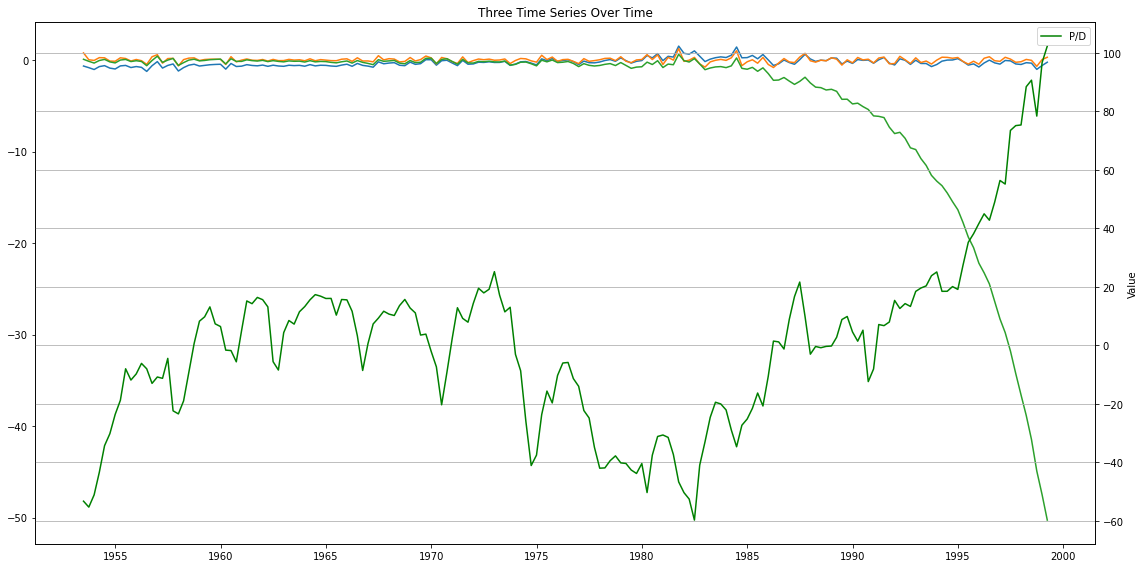

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example setup: simulate some data

# Now plotting
fig, ax1 = plt.subplots(figsize=(16, 8)) # Adjust the figure size for Jupyter Notebook


ax1.plot(data.index, res.smoothed_state[0], label='dp')
ax1.plot(data.index, res.smoothed_state[3], label='da')
ax1.plot(data.index, res.smoothed_state[6], label='ea')

ax2 = ax1.twinx()
ax2.plot(data.index, data['P/D'], label='P/D', color='green')

# Add labels, legend, title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Three Time Series Over Time')
plt.legend()
plt.grid(True)

# Improve x-axis date formatting
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


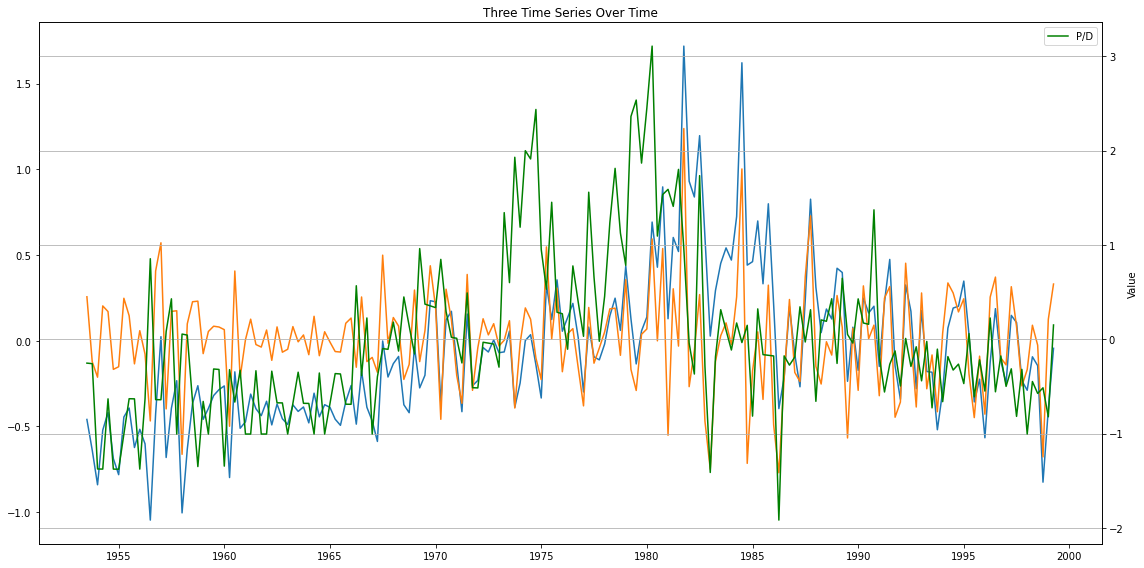

In [14]:
fig, ax1 = plt.subplots(figsize=(16, 8)) # Adjust the figure size for Jupyter Notebook


ax1.plot(data.index, res.smoothed_state[2], label='pi_p')
ax1.plot(data.index, res.smoothed_state[5], label='pi_a')
#ax1.plot(data.index, res.smoothed_state[6], label='ea')

ax2 = ax1.twinx()
ax2.plot(data.index, data['CPIQ'], label='P/D', color='green')

# Add labels, legend, title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Three Time Series Over Time')
plt.legend()
plt.grid(True)

# Improve x-axis date formatting
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


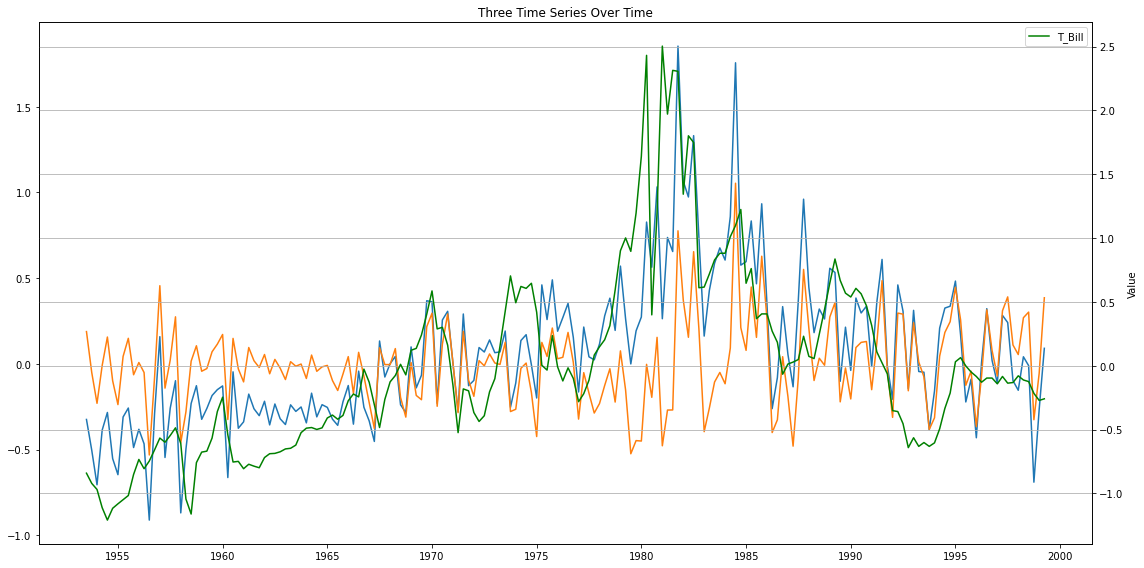

In [15]:
fig, ax1 = plt.subplots(figsize=(16, 8)) # Adjust the figure size for Jupyter Notebook


ax1.plot(data.index, res.smoothed_state[1], label='r_p')
ax1.plot(data.index, res.smoothed_state[4], label='r_a')
#ax1.plot(data.index, res.smoothed_state[6], label='ea')

ax2 = ax1.twinx()
ax2.plot(data.index, data['T_Bill'], label='T_Bill', color='green')

# Add labels, legend, title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Three Time Series Over Time')
plt.legend()
plt.grid(True)

# Improve x-axis date formatting
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'dp')

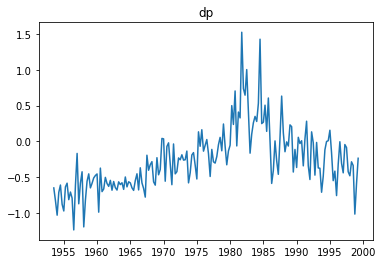

In [16]:
plt.plot(data.index, res.smoothed_state[0])
plt.title("dp")

Text(0.5, 1.0, 'da')

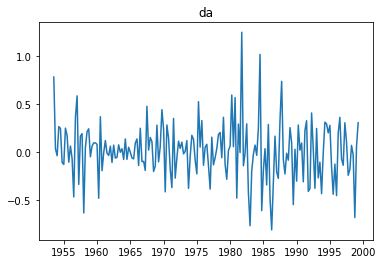

In [17]:
plt.plot(data.index, res.smoothed_state[3])
plt.title("da")

Text(0.5, 1.0, 'ea')

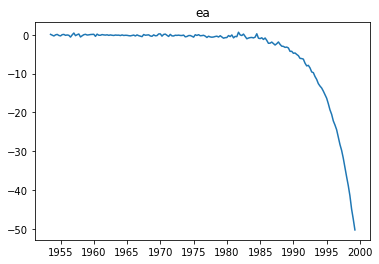

In [18]:
plt.plot(data.index, res.smoothed_state[6])
plt.title("ea")

Text(0.5, 1.0, 'rp')

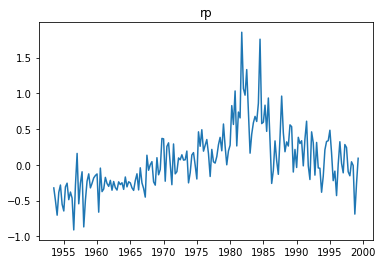

In [19]:
plt.plot(data.index, res.smoothed_state[1])
plt.title("rp")

Text(0.5, 1.0, 'ra')

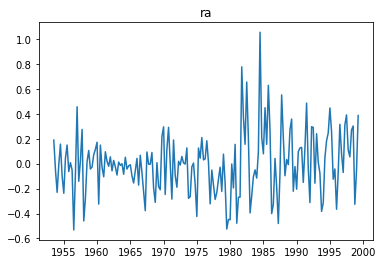

In [20]:
plt.plot(data.index, res.smoothed_state[4])
plt.title("ra")

Text(0.5, 1.0, 'pi_p')

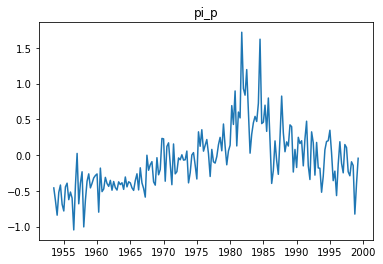

In [21]:
plt.plot(data.index, res.smoothed_state[2])
plt.title("pi_p")

Text(0.5, 1.0, 'pi_a')

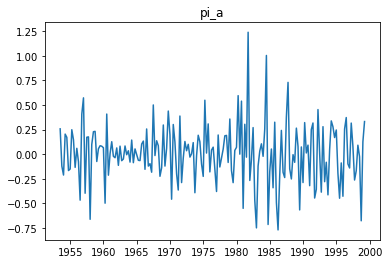

In [22]:
plt.plot(data.index, res.smoothed_state[5])
plt.title("pi_a")

Text(0.5, 1.0, 'tau_a')

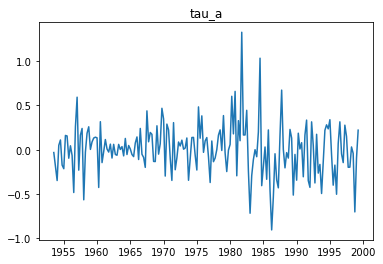

In [23]:
plt.plot(data.index, res.smoothed_state[7])
plt.title("tau_a")

In [24]:
res.simulate(40, repetitions=100).T

Date      1953-06-30   1953-09-30   1953-12-31   1954-03-31   1954-06-30  \
P/D  0  -1013.454217  -968.957290 -1010.153428 -1097.920234 -1001.508843   
     1    190.014613   437.997560   374.073556   525.044299   710.746623   
     2   4498.865268  4430.076272  4294.531291  4251.261175  4165.092681   
     3   3403.607632  3375.319975  2991.188945  3041.560731  3063.615431   
     4  -2489.429651 -2632.348623 -2791.304990 -2918.647257 -2817.834038   
...              ...          ...          ...          ...          ...   
CPIQ 95    66.056223     5.054093   -28.374215    19.064125    14.107868   
     96   -80.967364  -197.527318  -174.242252  -130.785560  -121.969418   
     97    -3.572823    13.953181    93.267774    79.907580   119.425002   
     98   -45.806801   -88.466448   -46.482689   -79.503453   -82.079812   
     99    48.005352   116.514610   137.860485   254.981599   238.199388   

Date      1954-09-30   1954-12-31   1955-03-31   1955-06-30   1955-09-30  ...  \
P/D  0  -1083.366610 -1100.585228 -1135.807937 -1098.597585 -1200.688602  ...   
     1    735.881204   749.582083   636.356758   732.808063   974.454794  ...   
     2   4079.320568  4008.877198  3813.476241  4080.927128  4078.226445  ...   
     3   3017.862875  2906.328809  2672.231518  2798.056565  2688.261850  ...   
     4  -2988.615170 -2904.623212 -2839.604283 -2824.649108 -2847.547271  ...   
...              ...          ...          ...          ...          ...  ...   
CPIQ 95    50.016254   -11.144137    -1.547916   -37.519307    17.595073  ...   
     96   -21.781555   -53.464484   -54.589946  -123.889299  -201.824706  ...   
     97    86.858094   145.248165    70.725583    40.123751   -12.281554  ...   
     98  -102.704217  -134.959646    44.620121    20.445813    46.207051  ...   
     99   339.216165   211.138209   249.271415   345.535771   313.316569  ...   

Date       1960-12-31    1961-03-31    1961-06-30     1961-09-30  \
P/D  0   -6500.136342  -7352.682400  -8866.878007  -10723.940094   
     1   63093.825406  77701.973698  95655.964563  117652.742918   
     2  -32940.235439 -41557.886587 -52041.145706  -65103.602065   
     3  -60111.551237 -74638.268267 -92648.960194 -114817.100278   
     4  -53718.184394 -65610.820309 -80289.157053  -98453.055502   
...               ...           ...           ...            ...   
CPIQ 95     32.658975     92.137195     82.804877     121.230807   
     96   -164.935836   -208.355064   -239.273926    -153.482246   
     97    -70.206418      4.119887    -88.182486       3.427364   
     98    -51.316304    -77.272682    -39.837594     -65.077477   
     99    297.830417    270.127653    146.296166     164.952469   

Date        1961-12-31     1962-03-31     1962-06-30     1962-09-30  \
P/D  0   -12788.959321  -15225.393801  -18460.456036  -22658.325232   
     1   145201.147412  178960.379844  220592.948022  271476.767178   
     2   -81270.400354 -101373.834862 -126048.186320 -156467.384009   
     3  -142154.534612 -175952.385442 -217633.553124 -268771.549578   
     4  -120627.657910 -148165.500502 -182121.320883 -224149.412382   
...                ...            ...            ...            ...   
CPIQ 95      95.052769      86.262873      49.563053      81.527399   
     96    -214.830549    -161.872764    -195.760073    -132.069996   
     97      -1.594136      17.706262     -40.387665     -48.433220   
     98     -53.379970       7.217931      50.089775      39.116413   
     99     192.226846     210.301007     166.457818     240.343222   

Date        1962-12-31     1963-03-31  
P/D  0   -27618.405470  -33803.581342  
     1   334351.422169  412311.143881  
     2  -194060.886959 -240561.961919  
     3  -331756.016813 -409476.817537  
     4  -275818.244911 -339647.650446  
...                ...            ...  
CPIQ 95     170.058716     242.712387  
     96    -217.199020    -109.243114  
     97     -11.399993      33.247723  
     98      85.536242      77.694475  
    

#wyszły bzdury
co jest zle

- design matrix?
- transformacje zmiennych
- inicjalne parametry
- inicjalizacja stanu 

In [28]:
from scipy import stats

In [39]:
scen = stats.t(3, .08, .15).rvs(1000)
np.quantile(scen, [.03, .25, .5, .75, .97])

array([-0.37892699, -0.04742991,  0.07561659,  0.19580682,  0.50071419])